# One-shot optimization

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [269]:
%pwd

'/home/ecotner/neural_tsp'

In [413]:
train_df = pd.read_csv("train.log")
size = len(train_df)
# print(f"{size} rows; {size//10:_}/200_000 episodes ({100*(size//10)/200_000:.1f}%)")
print(f"{size} rows/episodes")
train_df.tail()

624829 rows/episodes


,loss,reward,q_value
624824,5.167408,-56.757050,-54.483856
624825,134.040344,-66.911812,-55.334232
624826,602.113831,-13.281412,-37.819420
624827,117.743248,-40.905674,-51.756630
624828,160.654251,-67.276314,-54.601368


In [414]:
ma = train_df.ewm(span=len(train_df)/30).mean()

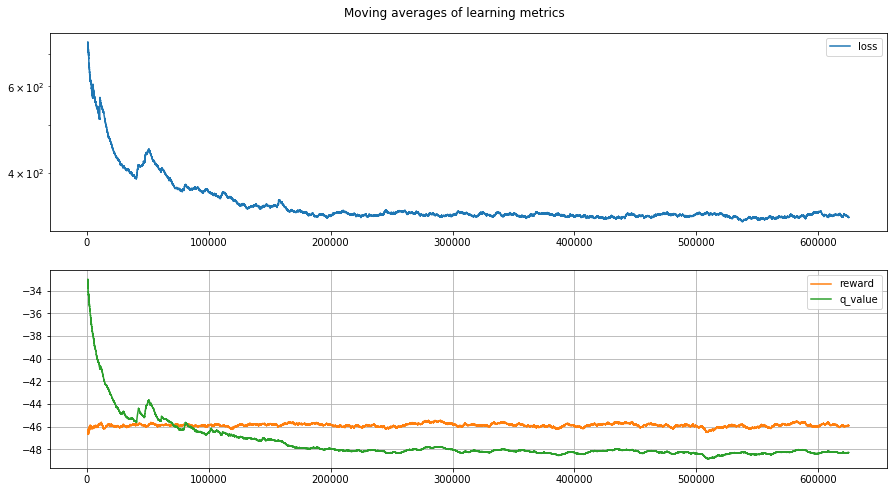

In [415]:
fig, axes = plt.subplots(nrows=2, figsize=(15,8))
skip = 1000

axes[0].plot(ma.iloc[skip:]['loss'], label='loss')
axes[0].set_yscale('log')
axes[0].legend(loc="upper right")

axes[1].plot(ma.iloc[skip:]['reward'], label='reward', color="C1")
axes[1].plot(ma.iloc[skip:]['q_value'], label='q_value', color="C2")
axes[1].grid()
axes[1].legend(loc="upper right")

fig.suptitle("Moving averages of learning metrics", x=0.5, y=0.925)
# plt.subplots_adjust(right=2, top=1.5)
plt.show()

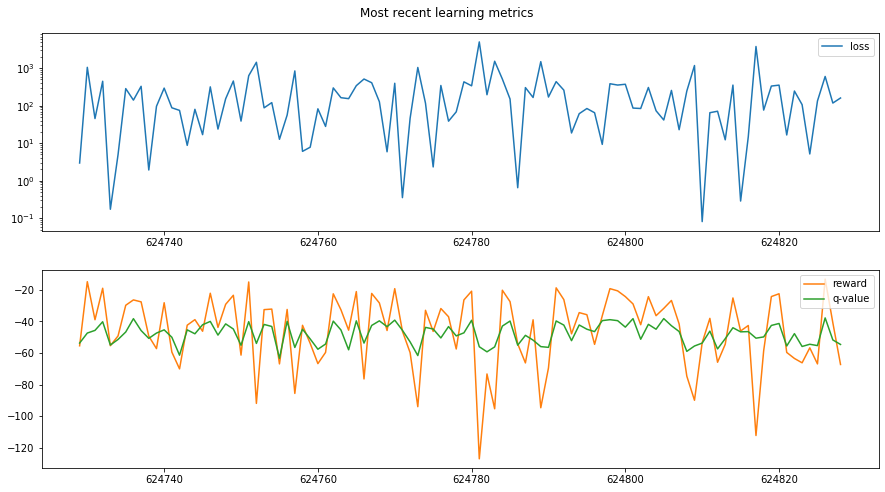

In [416]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 8))
window = 100
df = train_df.iloc[-window:]

axes[0].plot(df['loss'], label='loss')
axes[0].set_yscale('log')
axes[0].legend(loc="upper right")
axes[1].plot(df['reward'], label='reward', color="C1")
axes[1].plot(df['q_value'], label='q-value', color="C2")
axes[1].legend(loc="upper right")

fig.suptitle("Most recent learning metrics", x=0.5, y=0.925)
plt.show()

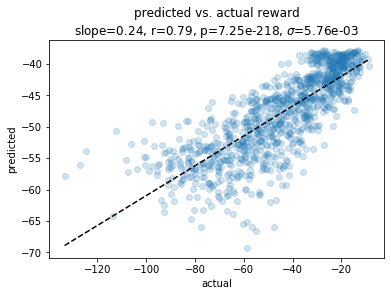

In [417]:
window = 1000
x = train_df.iloc[-window:]['reward'].values
y = train_df.iloc[-window:]['q_value'].values
plt.scatter(x, y, alpha=1/5)
m, b, r, p, s = stats.linregress(x, y)
x = np.linspace(x.min(), x.max(), 3)
y = m*x + b
plt.plot(x, y, linestyle="--", color='black')
plt.title(f"predicted vs. actual reward\nslope={m:.2f}, r={r:.2f}, p={p:.2e}, $\sigma$={s:.2e}")
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()